In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import pickle


In [ ]:
df = pd.read_excel('data_mins.xlsx')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop(['real_volume','spread'], inplace=True, axis=1)
df.head()

,time,open,high,low,close,tick_volume
0,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541
1,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541
2,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541
3,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541
4,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541


In [ ]:
df['HLAvg'] = df['high'].add(df['low']).div(2)
df.head()

,time,open,high,low,close,tick_volume,HLAvg
0,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.09445
1,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.09445
2,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.09445
3,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.09445
4,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.09445


In [ ]:
df['MA'] = df['HLAvg'].rolling(window=14).mean()    # We chose 14 as this is the default period used in most technical analysis tools
            # Because the window = 14 ... the first 13 row in MA will be NaN and then they will have a value .. So we may delete them
df

,time,open,high,low,close,tick_volume,HLAvg,MA
0,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN
1,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN
2,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN
3,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN
4,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN
...,...,...,...,...,...,...,...,...
99919,2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405
99920,2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331
99921,2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265
99922,2022-06-03 08:20:00,1.07489,1.07548,1.07482,1.07542,327,1.075150,1.075213


In [ ]:
df['Returns'] = np.log(df['MA']/df['MA'].shift(1))
df

,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
0,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN,NaN
1,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN,NaN
2,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN,NaN
3,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN,NaN
4,2019-09-27 19:50:00,1.09464,1.09477,1.09413,1.09441,541,1.094450,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99919,2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078
99920,2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068
99921,2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062
99922,2022-06-03 08:20:00,1.07489,1.07548,1.07482,1.07542,327,1.075150,1.075213,-0.000048


In [ ]:
df=df.dropna()

In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)

#Batch size

In [ ]:
batch_size=32
reminder=df.shape[0]%batch_size
print(reminder)
df=df.drop(df.index[:reminder])
df

6


,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
6,2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026
7,2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019
8,2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009
9,2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012
10,2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020
...,...,...,...,...,...,...,...,...,...
99905,2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078
99906,2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068
99907,2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062
99908,2022-06-03 08:20:00,1.07489,1.07548,1.07482,1.07542,327,1.075150,1.075213,-0.000048


In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns
time,,,,,,,,
2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026
2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019
2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009
2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012
2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020
...,...,...,...,...,...,...,...,...
2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078
2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068
2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["scaled_return"]= scaler.fit_transform(df[['Returns']].values)



In [ ]:
pickle.dump(scaler,open("scaler.bin",'wb'))

In [ ]:
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026,0.542451
2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019,0.546494
2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009,0.551591
2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012,0.550360
2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020,0.545966
...,...,...,...,...,...,...,...,...,...
2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078,0.514661
2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068,0.519845
2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062,0.523420


In [ ]:
df.to_excel("final_min_df.xlsx")

In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns","close","tick_volume"],axis=1)


In [ ]:
train_size=int((0.8*df.shape[0])-((0.8*df.shape[0])% batch_size))
print(train_size)
test_size=(df.shape[0]-train_size)//2
print(test_size)

val_size=(df.shape[0]-train_size)//2
print(val_size)

window_size=2*batch_size #64 hours
df_train = features[:- val_size - test_size]
df_val = features[- val_size - test_size - window_size:- test_size]
df_test = features[- test_size - window_size:]




79904
10000
10000


In [ ]:
df_test


,scaled_return
time,
2022-02-25 09:10:00,0.501298
2022-02-25 09:20:00,0.516557
2022-02-25 09:30:00,0.526331
2022-02-25 09:40:00,0.547941
2022-02-25 09:50:00,0.537821
...,...
2022-06-03 07:50:00,0.514661
2022-06-03 08:00:00,0.519845
2022-06-03 08:10:00,0.523420


In [ ]:

def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

In [ ]:

def features_labels2(df):
  x,y=[],[]
  for i in range(df.shape[0]-window_size-1):
    x.append(np.array(df[i:i+window_size]))
    y.append(features['scaled_return'].iloc[i+window_size])
    

  x=np.array(x)
  y=np.array(y)
  return x,y

In [ ]:
x_train,y_train=features_labels1(features[['scaled_return']].values)
x_val,y_val=features_labels1(df_val[['scaled_return']].values)


In [ ]:
x_train.shape

(99840, 64, 1)

In [ ]:
model = keras.models.Sequential()
model.add(layers.LSTM(76, input_shape=(x_train.shape[1], 1), return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.compile(loss="mse", optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 76)                23712     
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense (Dense)               (None, 1)                 77        
                                                                 
Total params: 23,789
Trainable params: 23,789
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=x_train, y=y_train ,epochs=50,batch_size=32,validation_data=(x_val,y_val),shuffle=False)

Epoch 1/50
3120/3120 [==============================] - 22s 5ms/step - loss: 0.0020 - accuracy: 2.0032e-05 - val_loss: 5.5886e-04 - val_accuracy: 1.0000e-04
Epoch 2/50
3120/3120 [==============================] - 15s 5ms/step - loss: 6.5513e-04 - accuracy: 2.0032e-05 - val_loss: 3.7504e-04 - val_accuracy: 1.0000e-04
Epoch 3/50
3120/3120 [==============================] - 15s 5ms/step - loss: 3.2166e-04 - accuracy: 2.0032e-05 - val_loss: 2.3543e-04 - val_accuracy: 1.0000e-04
Epoch 4/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.6452e-04 - accuracy: 2.0032e-05 - val_loss: 2.3349e-04 - val_accuracy: 1.0000e-04
Epoch 5/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.5494e-04 - accuracy: 2.0032e-05 - val_loss: 2.4046e-04 - val_accuracy: 1.0000e-04
Epoch 6/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.4179e-04 - accuracy: 2.0032e-05 - val_loss: 2.1592e-04 - val_accuracy: 1.0000e-04
Epoch 7/50
3120/3120 [================

In [ ]:
y_pred=model.predict(x_train)

In [ ]:
len(np.unique(y_pred))/len(y_pred)

0.9775540865384615

In [ ]:
filename = 'finalized_model.sav'
keras.models.save_model(model, filename)


INFO:tensorflow:Assets written to: finalized_model.sav/assets


INFO:tensorflow:Assets written to: finalized_model.sav/assets


In [ ]:
import os

In [ ]:
!zip -r /content/file.zip /content/finalized_model.sav/


  adding: content/finalized_model.sav/ (stored 0%)
  adding: content/finalized_model.sav/saved_model.pb (deflated 90%)
  adding: content/finalized_model.sav/assets/ (stored 0%)
  adding: content/finalized_model.sav/variables/ (stored 0%)
  adding: content/finalized_model.sav/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/finalized_model.sav/variables/variables.index (deflated 59%)
  adding: content/finalized_model.sav/keras_metadata.pb (deflated 86%)


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf

In [ ]:
df=pd.read_excel("final_min_df.xlsx")
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026,0.542451
2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019,0.546494
2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009,0.551591
2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012,0.550360
2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020,0.545966
...,...,...,...,...,...,...,...,...,...
2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078,0.514661
2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068,0.519845
2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062,0.523420


In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns",'close','tick_volume'],axis=1)

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('')
scaler=pickle.load(open("scaler.bin",'rb'))
model = tf.keras.models.load_model("finalized_model.sav")


In [ ]:
window_size=64
def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

x,y=features_labels1(features[['scaled_return']].values)

In [ ]:
x.shape

(99840, 64, 1)

In [ ]:
y_pred=model.predict(x)

In [ ]:
y_pred.shape

(99840, 1)

In [ ]:
df.shape

(99904, 9)

In [ ]:
df['pred_scaled'] = np.pad(y_pred.reshape(y_pred.shape[0]), (window_size, 0), mode='constant', constant_values=np.nan)


In [ ]:
df['pred_returns'] = scaler.inverse_transform(df[['pred_scaled']].values)
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns
time,,,,,,,,,,,
2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026,0.542451,NaN,NaN
2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019,0.546494,NaN,NaN
2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009,0.551591,NaN,NaN
2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012,0.550360,NaN,NaN
2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020,0.545966,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078,0.514661,0.521976,-0.000064
2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068,0.519845,0.527852,-0.000054
2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062,0.523420,0.536967,-0.000037


In [ ]:
df['pred_MA'] = df['MA'].mul(np.exp(df['pred_returns'].shift(-1))).shift(1) # Log Returns
df


,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns,pred_MA
time,,,,,,,,,,,,
2019-09-27 22:00:00,1.09398,1.09422,1.09387,1.09415,320,1.094045,1.094233,-0.000026,0.542451,NaN,NaN,NaN
2019-09-27 22:10:00,1.09414,1.09428,1.09404,1.09409,266,1.094160,1.094213,-0.000019,0.546494,NaN,NaN,NaN
2019-09-27 22:20:00,1.09409,1.09434,1.09409,1.09433,267,1.094215,1.094202,-0.000009,0.551591,NaN,NaN,NaN
2019-09-27 22:30:00,1.09433,1.09434,1.09410,1.09413,199,1.094220,1.094189,-0.000012,0.550360,NaN,NaN,NaN
2019-09-27 22:40:00,1.09413,1.09425,1.09412,1.09423,169,1.094185,1.094167,-0.000020,0.545966,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 07:50:00,1.07518,1.07518,1.07458,1.07458,254,1.074880,1.075405,-0.000078,0.514661,0.521976,-0.000064,1.075419
2022-06-03 08:00:00,1.07458,1.07510,1.07450,1.07491,212,1.074800,1.075331,-0.000068,0.519845,0.527852,-0.000054,1.075347
2022-06-03 08:10:00,1.07488,1.07494,1.07470,1.07489,155,1.074820,1.075265,-0.000062,0.523420,0.536967,-0.000037,1.075292


In [ ]:
df=df[window_size:]

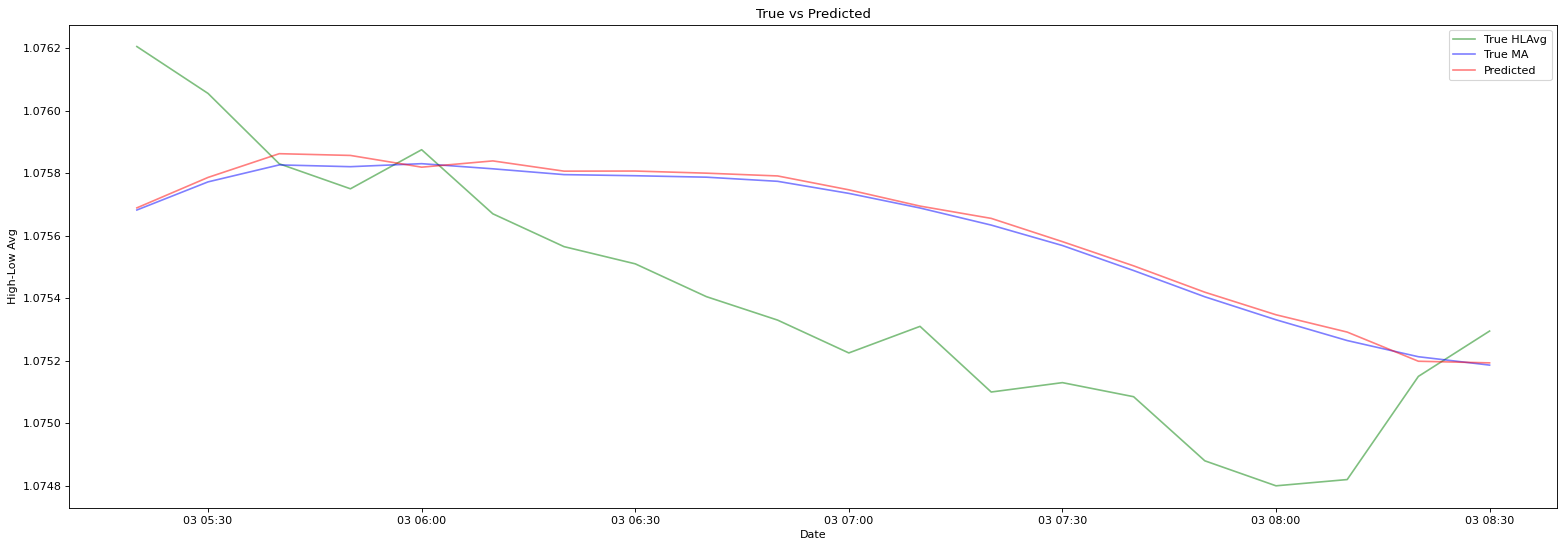

In [ ]:
plt.figure(figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['HLAvg'][-20:], color = 'green', label = 'True HLAvg', alpha=0.5)
plt.plot(df['MA'][-20:], color = 'blue', label = 'True MA', alpha=0.5)
plt.plot(df['pred_MA'][-20:], color = 'red', label = 'Predicted', alpha=0.5)
plt.title('True vs Predicted')
plt.xlabel('Date')
plt.ylabel('High-Low Avg')
plt.legend()
plt.show()